# Mutually Recursive HITS algorithm

In [79]:
import heapq 
import math
from collections import defaultdict # dictionary of lists
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # to show graph

## 1. Implementation of Graph and HITS algorithm

In [80]:
# Class graph used to implement the graph of webpages
class Graph:

    def __init__(self,vertices):
        self.nodes = [] #list of nodes 
        for i in range(len(vertices)):
            self.nodes.append(vertices[i])
        self.edges = []
        #out_link keeps the track of edges moving away from the node
        self.out_link = defaultdict(list)
        #in_link keeps the track of edges moving towards the node
        self.in_link = defaultdict(list)
        
    #(u,v) represents that there is an edge from u to v
    def addEdge(self,u,v): 
        #check if edge is already present
        for edges in self.edges:
            if u==edges[0] and v==edges[1]:
                print("Edge already exists")
                return
        self.edges.append([u,v])
        #edge from u to v  
        #v in the outlink of u
        self.out_link[u].append(v)
        #edge towards v from u
        #u in the inlink of v
        self.in_link[v].append(u)
        
    def print_graph(self):
        for node in self.nodes:
            print("Node :",node)
            print("Outlinks:",self.out_link[node])
            print("Inlinks:",self.in_link[node])
            print()
            
    def get_HITS(self):
        n = len(self.nodes)
        
        #initialize hub and autority vectors to 1
        print("Initial Hub weight vector: ")
        prev_hub_weight = np.ones(n)
        print(prev_hub_weight)
        
        print("Initial Authority weight vector: ")
        prev_authority_weight = np.ones(n)
        print(prev_authority_weight)
        print("--------------------------------------------------------------------------------------------")
        for i in range(10):
            print("Iteration number: ",i+1)
            
            #calculate authority vector by using previous hub vector
            curr_authority_weight = []
            for node in range(n):
                temp=0
                for inlinks in self.in_link[node]:
                    temp=temp+prev_hub_weight[inlinks]
                curr_authority_weight.append(temp)
                
            #normalize authority vector
            auth_sum = sum(curr_authority_weight)
            curr_authority_weight=curr_authority_weight/auth_sum
            curr_authority_weight=np.array(curr_authority_weight)
            print("Authority weights :",curr_authority_weight)
            
            #calculate hub vector by using current authority vector
            curr_hub_weight = []
            for node in range(n):
                temp=0
                for outlinks in self.out_link[node]:
                    temp=temp+curr_authority_weight[outlinks]
                curr_hub_weight.append(temp)
                
            #normalize hub vector
            hub_sum = sum(curr_hub_weight)
            curr_hub_weight=curr_hub_weight/hub_sum
            curr_hub_weight=np.array(curr_hub_weight)
            print("Hub weights :",curr_hub_weight)
            print("--------------------------------------------------------------------------------------------")
            
            #check if hub and authority vectors have reached equilibrium
            auth_differences = abs(prev_authority_weight - curr_authority_weight)
            hub_differences = abs(prev_hub_weight - curr_hub_weight)
            
            if np.all(auth_differences <= 0.001) and np.all(hub_differences <= 0.001) :
                break
            
            #continue to the next iteration using currently calculated hub and authority vectors
            prev_authority_weight = curr_authority_weight
            prev_hub_weight=curr_hub_weight
            
        return curr_hub_weight,curr_authority_weight

## 2. Example

Populating the interactive namespace from numpy and matplotlib


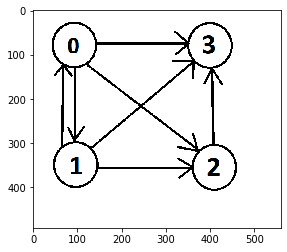

In [81]:
%pylab inline

img = mpimg.imread('graph.png')
imgplot = plt.imshow(img)
plt.show()

In [82]:
g = Graph([0,1,2,3]) 

g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(0, 3)

g.addEdge(1, 0)
g.addEdge(1, 2)
g.addEdge(1, 3)

g.addEdge(2, 3)

g.print_graph()

Node : 0
Outlinks: [1, 2, 3]
Inlinks: [1]

Node : 1
Outlinks: [0, 2, 3]
Inlinks: [0]

Node : 2
Outlinks: [3]
Inlinks: [0, 1]

Node : 3
Outlinks: []
Inlinks: [0, 1, 2]



In [74]:
hub,auth=g.get_HITS()
print("\nFinal Hub Weights :",hub)
print("Final Authority Weights :",auth)

Initial Hub weight vector: 
[1. 1. 1. 1.]
Initial Authority weight vector: 
[1. 1. 1. 1.]
--------------------------------------------------------------------------------------------
Iteartion number:  1
Authority weights : [0.14285714 0.14285714 0.28571429 0.42857143]
Hub weights : [0.4 0.4 0.2 0. ]
--------------------------------------------------------------------------------------------
Iteartion number:  2
Authority weights : [0.15384615 0.15384615 0.30769231 0.38461538]
Hub weights : [0.40740741 0.40740741 0.18518519 0.        ]
--------------------------------------------------------------------------------------------
Iteartion number:  3
Authority weights : [0.15492958 0.15492958 0.30985915 0.38028169]
Hub weights : [0.40816327 0.40816327 0.18367347 0.        ]
--------------------------------------------------------------------------------------------
Iteartion number:  4
Authority weights : [0.15503876 0.15503876 0.31007752 0.37984496]
Hub weights : [0.4082397 0.4082397 0.1